In [0]:
#Import necessary libraries
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
#Loading Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [54]:
x_train.shape

(60000, 28, 28)

In [0]:
single_image = x_train[0]

In [56]:
single_image.shape

(28, 28)

In [57]:
y_train.shape

(60000,)

In [0]:
y_example = to_categorical(y_train)

In [59]:
y_example.shape

(60000, 10)

In [60]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [62]:
single_image.max()

255

In [63]:
single_image.min()

0

In [0]:
x_train = x_train/255
x_test = x_test/255

In [0]:
scaled_single = x_train[0]

In [66]:
scaled_single.max()

1.0

In [67]:
x_train.shape

(60000, 28, 28)

In [68]:
x_test.shape

(10000, 28, 28)

In [0]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000,28,28,1)

In [70]:
x_train.shape

(60000, 28, 28, 1)

In [71]:
x_test.shape

(10000, 28, 28, 1)

In [72]:
y_cat_test.shape

(10000, 10)

In [0]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

In [74]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [0]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [76]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1530 - accuracy: 0.9540 - val_loss: 0.0538 - val_accuracy: 0.9828
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0498 - accuracy: 0.9847 - val_loss: 0.0428 - val_accuracy: 0.9852
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0323 - accuracy: 0.9898 - val_loss: 0.0432 - val_accuracy: 0.9850
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0222 - accuracy: 0.9926 - val_loss: 0.0379 - val_accuracy: 0.9873
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0149 - accuracy: 0.9953 - val_loss: 0.0402 - val_accuracy: 0.9876
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0117 - accuracy: 0.9959 - val_loss: 0.0408 - val_accuracy: 0.9871


In [77]:
model.metrics_names

['loss', 'accuracy']

In [0]:
losses = pd.DataFrame(model.history.history)

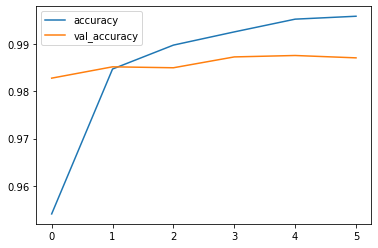

In [80]:
losses[['accuracy','val_accuracy']].plot()

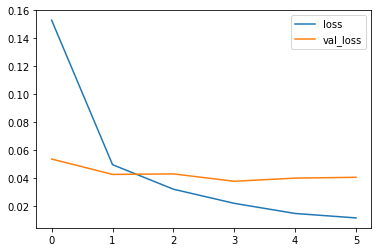

In [81]:
losses[['loss','val_loss']].plot()

In [82]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.040761563926935196, 0.9871000051498413]


In [0]:
predictions = model.predict_classes(x_test)

In [91]:
predictions[0]

7

In [92]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [0]:
my_number = x_test[100]

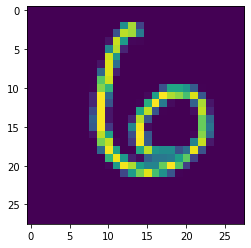

In [94]:
plt.imshow(my_number.reshape(28,28))

In [95]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict_classes(my_number.reshape(1,28,28,1))

array([6])